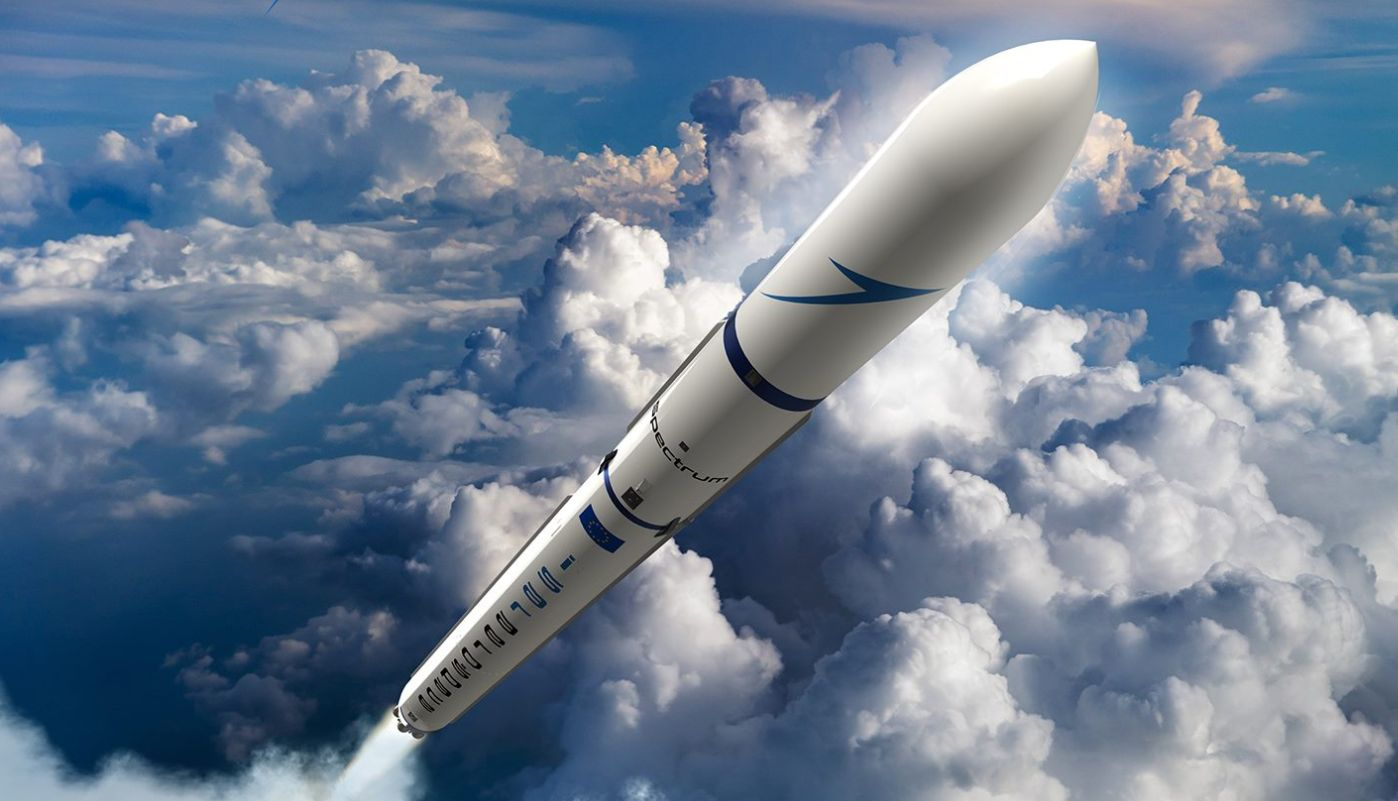

# Importing libraries and data exploration.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
sns.set_palette(palette='deep',n_colors=16,desat=0.8)
%matplotlib inline

missions = pd.read_csv('../input/all-space-missions-from-1957/Space_Corrected.csv')
missions.head(10)

In [ ]:
#looking for missing values and data types
missions.info()

In [ ]:
#finding companies that launch rockets in descending order
companies = missions['Company Name'].value_counts()
companies

In [ ]:
#getting countries
missions['Country'] = missions['Location'].apply(lambda location : location.split(', ')[-1])
#finding years
missions['Year'] = pd.to_datetime(missions['Datum']).apply(lambda year: year.year)
missions.head(10)

In [ ]:
missions['Year'].value_counts()

# Data Visualization

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y='Country',data=missions,order=missions['Country'].value_counts().index)
ax.set_title('Number of launches per Country',fontsize=18)
ax.set_xlabel('Launches',fontsize=18)
ax.set_ylabel('Country',fontsize=18)
ax.set_xscale('symlog')
ax.set_frame_on(False)
plt.show()

# Launches per Year

As we can see in the plot, 1971 was the year with more launches due to the Cold War and two years after USA landed on the Moon.

In [ ]:
plt.figure(figsize=(10,20))
ax = sns.countplot(y='Year',data=missions,order=missions['Year'].value_counts().index)
ax.set_xscale('linear')
ax.set_title('Number of launches per Year (Count Order)',fontsize=18)
ax.set_xlabel('Launches',fontsize=18)
ax.set_ylabel('Year',fontsize=18)
ax.set_frame_on(False)
plt.show()

# Private companies break into space race

In [ ]:
plt.figure(figsize=(10,15))
ax = sns.countplot(y='Company Name',data=missions,order=missions['Company Name'].value_counts().index)
ax.set_xscale('linear')
ax.set_title('Number of launches per Company',fontsize=18)
ax.set_xlabel('Launches',fontsize=18)
ax.set_ylabel('Company',fontsize=18)
ax.set_frame_on(False)
plt.show()

# Mission Sucess vs. Mission Failure

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y='Status Mission',data=missions,order=missions['Status Mission'].value_counts().index)
ax.set_xscale('linear')
ax.set_title('Status Mission',fontsize=18)
ax.set_xlabel('Count',fontsize=18)
ax.set_ylabel('Status',fontsize=18)
ax.set_frame_on(False)
plt.show()

In [ ]:
Russia = missions[missions['Country']=='Russia']
USA = missions[missions['Country']=='USA']
China = missions[missions['Country']=='China']
India = missions[missions['Country']=='India']


fig = plt.figure(figsize=(15,15),frameon=False,tight_layout=True,clear=True)
plt.axis('off')
plt.title("Status Mission in Top 4 Space Competitors",fontsize=24)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.countplot(x='Status Mission',data=Russia,order=Russia['Status Mission'].value_counts().index,ax=ax1)
ax1.set_yscale('linear')
ax1.set_ylabel("Russia",fontsize=18)
ax1.set_xlabel('Status',fontsize=18)
ax1.set_frame_on(False)


sns.countplot(x='Status Mission',data=USA,order=USA['Status Mission'].value_counts().index,ax=ax2)
ax2.set_yscale('linear')
ax2.set_ylabel("USA",fontsize=18)
ax2.set_xlabel('Status',fontsize=18)
ax2.set_frame_on(False)


sns.countplot(x='Status Mission',data=China,order=China['Status Mission'].value_counts().index,ax=ax3)
ax3.set_yscale('linear')
ax3.set_ylabel("China",fontsize=18)
ax3.set_xlabel('Status',fontsize=18)
ax3.set_frame_on(False)


sns.countplot(x='Status Mission',data=India,order=India['Status Mission'].value_counts().index,ax=ax4)
ax4.set_yscale('linear')
ax4.set_ylabel("India",fontsize=18)
ax4.set_xlabel('Status',fontsize=18)
ax4.set_frame_on(False)



# Rockets Active vs. Rockets Retired

In [ ]:
plt.figure(figsize=(10,10))
st = missions['Status Rocket'].value_counts()
plt.pie(st,shadow=False,autopct='%1.1f%%',colors=('tab:red', 'tab:blue'),explode=(0,0.05),startangle=40)
plt.legend(['Stattus Retired','Status Acitve'])
plt.title('Status Rocket', fontsize=18)
plt.show()